<a href="https://colab.research.google.com/github/alousada/100datascienceprojects/blob/main/Project_001_2023_(BR3_categorias).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project n# 001-2023**



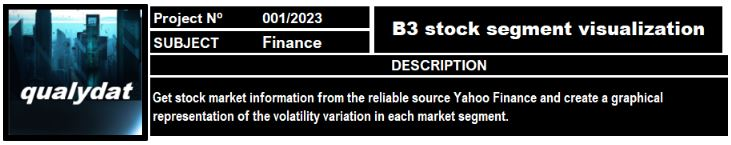

## **1 - Problem Statement**

In this project, **the problem to be solved is the identification of the best way to visualize the price variation of B3 assets by segments following the criterion adopted by the Yahoo Finance database**. This will allow decision-makers to identify asset segments where there is a greater increase in price fluctuations over a given period of time and more risks to be taken. Two methods will be selected as a means of measuring data variation: Parkinson's volatility and weighted volatility.

## **2 - Sourcing Data**

### 2.1 INSTALL THE NECESSARY LIBARIES:

In [ ]:
import pip
import os
def upgrade(packages):
    for package in packages:
        try:
            pip.main(['install', package])
            print ("Installed !")
            print ("#"*50)
        except:
            print ("Installation failed !!!")
            print ("#"*50)

inst = ["mpl_finance", "mplfinance"]
upgrade(inst)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Collecting mpl_finance

Using cached mpl_finance-0.10.1-py3-none-any.whl (8.4 kB)

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from mpl_finance) (3.7.1)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (1.0.7)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (4.39.3)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (1.4.4)

Requirement already satisfied: numpy>=1.20 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (1.22.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (23.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (8.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (3.0.9)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mpl_finance) (2.8.2)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib->mpl_finance) (1.16.0)

Installing collected packages: mpl_finance

Successfully installed mpl_finance-0.10.1

Installed !
##################################################


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Collecting mplfinance

Downloading mplfinance-0.12.9b7-py3-none-any.whl (73 kB)

Output()

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from mplfinance) (3.7.1)

Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from mplfinance) (1.5.3)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (1.0.7)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (0.11.0)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (4.39.3)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (1.4.4)

Requirement already satisfied: numpy>=1.20 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (1.22.4)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (23.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (8.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (3.0.9)

Requirement already satisfied: python-dateutil>=2.7 in /usr/local/lib/python3.10/dist-packages (from matplotlib->mplfinance) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas->mplfinance) (2022.7.1)

Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.10/dist-packages (from python-dateutil>=2.7->matplotlib->mplfinance) (1.16.0)

Installing collected packages: mplfinance

Successfully installed mplfinance-0.12.9b7

Installed !
##################################################


### 2.2 IMPORT LIBRARIES

In [ ]:
import pandas as pd
import requests
import io
from datetime import datetime
import numpy as np
from urllib.parse import urlencode
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import requests
from bs4 import BeautifulSoup
import matplotlib.dates as mdates
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import mplfinance as mpf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

### 2.3 FUNÇÕES SOURCING DATA

In [ ]:
# Versão da função que coleta os tickers no site da informoney e categorias de atuação de cada empresa

def retorna_tickers_df(url):
    # Make an HTTP request to the page
    response = requests.get(url)

    # Parse the HTML of the page using Beautiful Soup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all divs with class 'list-companies'
    divs = soup.find_all('div', {'class': 'list-companies'})

    # Create an empty list to store the DataFrames
    dfs = []

    # Loop through the divs, extract the data, and add a DataFrame to the list
    for div in divs:
        # Extract the table title
        mercado = div.find('h2').text.strip()

        # Extract the table rows
        rows = []
        for tr in div.find_all('tr'):
            row = []
            for td in tr.find_all('td'):
                row.append(td.text.strip())
            if row:
                rows.append(row)

        # Fill the rows with empty values, if necessary
        for row in rows:
            if len(row) == 1:
                row.extend(['', '', '', '', '', '', ''])
            elif len(row) == 2:
                row.extend(['', '', '', '', '', ''])
            elif len(row) == 3:
                row.extend(['', '', '', '', ''])
            elif len(row) == 4:
                row.extend(['', '', '', ''])
            elif len(row) == 5:
                row.extend(['', '', ''])
            elif len(row) == 6:
                row.extend(['', ''])
            elif len(row) == 7:
                row.append('')

        # Create a DataFrame from the extracted data
        df = pd.DataFrame(rows, columns=['Company', 'TICKER1', 'TICKER2', 'TICKER3', 'TICKER4', 'TICKER5', 'TICKER6', 'TICKER7'])

        # Add the Market columns to the DataFrame
        df.insert(0, 'Market', mercado)

        # Add the DataFrame to the list
        dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    df_tickers = pd.concat(dfs, ignore_index=True)

    # Add '.SA' to all non-null values in the Ticker columns
    ticker_columns = [col for col in df_tickers.columns if 'TICKER' in col]
    for col in ticker_columns:
        df_tickers[col] = df_tickers[col].apply(lambda x: x+'.SA' if x != '' else x)
    
    return df_tickers


In [ ]:
# load data from yahoo.finance to a dataframe
def get_data_from_yahoo(tickers, start_date, end_date):
    """
    This function takes a list of tickers and start and end dates as arguments, and retrieves data from the Yahoo Finance API.

    Parameters:
    tickers (list): List of stock tickers.
    start_date (string): Start date in the format 'DD/MM/YYYY'.
    end_date (string): End date in the format 'DD/MM/YYYY'.

    Returns:
    data (DataFrame): A DataFrame with the requested data.
    """
    data = pd.DataFrame()

    for ticker in tickers:
        print(ticker)
        try: 
            url = 'https://query1.finance.yahoo.com/v7/finance/download/' + ticker
            params = {
                'period1': date_to_unix(start_date),
                'period2': date_to_unix(end_date),
                'interval': '1d',
                'events': 'history',
                'includeAdjustedClose': 'true'
            }
            url = f'{url}?{urlencode(params)}'
            tempdf = pd.read_csv(url)
            tempdf['Ticker'] = ticker
            data = pd.concat([data, tempdf], sort=False, ignore_index=True)
        except Exception as e:
            print(e)
            continue

    # Set the Ticker column as the first column
    #first_column = data.pop('Ticker')
    #data.insert(0, 'Ticker', first_column)

    return data

In [ ]:
# convert date to format unix
def date_to_unix(date):
    """
    Converte uma data em formato de string para o timestamp Unix.
    Entrada: date (str) - data em formato "dd/mm/yyyy"
    Saída: timestamp Unix (int)
    """
    try:
        # Convert the date string into a datetime object
        dt = datetime.strptime(date, "%d/%m/%Y")
    except ValueError:
        # Raise an exception if the date string is not in the correct format
        raise ValueError("A data deve estar no formato 'dd/mm/yyyy'")
    # Return the unix timestamp of the date
    return int(dt.timestamp())

### 2.3 LOAD DATA CODE

In [ ]:
# load B3 tickers from infomoney site

url = 'https://www.infomoney.com.br/cotacoes/empresas-b3/'
dt_tickers = retorna_tickers_df(url)

In [ ]:
dt_tickers

,Market,Company,TICKER1,TICKER2,TICKER3,TICKER4,TICKER5,TICKER6,TICKER7
0,Bens Industriais,Riza Arctium Real Estate FII Closed Fund,RZAT11.SA,,,,,,
1,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...,GRWA11.SA,,,,,,
2,Bens Industriais,Sparta Fiagro Fundo de Investimento Cadeias Pr...,CRAA11.SA,,,,,,
3,Bens Industriais,ZAMP S.A.,ZAMP3.SA,,,,,,
4,Bens Industriais,HGI Capital,HGAG11.SA,,,,,,
...,...,...,...,...,...,...,...,...,...
419,Utilidade Pública,Renaova,RNEW11.SA,,,,,,
420,Utilidade Pública,Ger Paranapanema,GEPA4.SA,GEPA3.SA,,,,,
421,Utilidade Pública,CESP,CESP6.SA,CESP5.SA,CESP3F.SA,CESP3.SA,,,
422,Utilidade Pública,Cemig,CMIG4.SA,CMIG3F.SA,CMIG3.SA,,,,


In [ ]:
# load the tickers on a list

tickers = []
for col in dt_tickers.columns:
    if col.startswith('TICKER'):
        ticker_col = dt_tickers[col].fillna('')
        tickers += list(ticker_col[~(ticker_col.astype(str).str.endswith(('F', '11')))])

tickers = [t for t in tickers if t != '']

# tickers = [ticker + '.SA' for ticker in tickers] # não é mais necessário incluido '.SA' diretamente na função

print(f"tickers = {tickers}")

tickers = ['RZAT11.SA', 'GRWA11.SA', 'CRAA11.SA', 'ZAMP3.SA', 'HGAG11.SA', 'BBGO11.SA', 'AGRX11.SA', 'PLCA11.SA', 'RURA11.SA', 'SNAG11.SA', 'GCRA11.SA', 'VCRA11.SA', 'KNCA11.SA', 'NCRA11.SA', 'CPTR11.SA', 'FGAA11.SA', 'EGAF11.SA', 'VGIA11.SA', 'LSAG11.SA', 'N2ET34.SA', 'M1TA34.SA', 'FOOD11.SA', 'AERI3F.SA', 'ICBR3.SA', 'DOTZ3F.SA', 'GOLL3.SA', 'VIIA3F.SA', 'ARML3.SA', 'MLAS3.SA', 'CBAV3.SA', 'TTEN3.SA', 'BRBI11.SA', 'NINJ3.SA', 'ATEA3.SA', 'MODL4.SA', 'MODL3.SA', 'VITT3.SA', 'KRSA3.SA', 'CXSE3.SA', 'RIOS3.SA', 'HCAR3.SA', 'GGPS3.SA', 'MATD3.SA', 'ALLD3.SA', 'BLAU3.SA', 'ATMP3.SA', 'ASAI3.SA', 'JSLG3.SA', 'CMIN3.SA', 'ELMD3.SA', 'ORVR3.SA', 'OPCT3.SA', 'WEST3.SA', 'CSED3.SA', 'BMOB3.SA', 'JALL3.SA', 'MBLY3.SA', 'ESPA3.SA', 'VAMO3.SA', 'INTB3.SA', 'CJCT11.SA', 'BMLC11.SA', 'RECR11.SA', 'URPR11.SA', 'DEVA11.SA', 'MFAI11.SA', 'NGRD3.SA', 'AVLL3.SA', 'RRRP3.SA', 'ENJU3.SA', 'CASH3.SA', 'TFCO4.SA', 'CONX3.SA', 'GMAT3.SA', 'SEQL3.SA', 'PASS3.SA', 'BOAS3.SA', 'MELK3.SA', 'HBSA3.SA', 'SIMH3F.SA

In [ ]:
# take data from yahoo.finance site based on tickers

data = get_data_from_yahoo(tickers, '01/01/2008', '08/06/2023')

RZAT11.SA
GRWA11.SA
CRAA11.SA
ZAMP3.SA
HGAG11.SA
BBGO11.SA
AGRX11.SA
PLCA11.SA
RURA11.SA
SNAG11.SA
GCRA11.SA
VCRA11.SA
KNCA11.SA
NCRA11.SA
CPTR11.SA
FGAA11.SA
EGAF11.SA
VGIA11.SA
LSAG11.SA
N2ET34.SA
M1TA34.SA
FOOD11.SA
AERI3F.SA
ICBR3.SA
HTTP Error 404: Not Found
DOTZ3F.SA
GOLL3.SA
HTTP Error 404: Not Found
VIIA3F.SA
ARML3.SA
MLAS3.SA
CBAV3.SA
TTEN3.SA
BRBI11.SA
NINJ3.SA
ATEA3.SA
HTTP Error 404: Not Found
MODL4.SA
HTTP Error 404: Not Found
MODL3.SA
VITT3.SA
KRSA3.SA
CXSE3.SA
RIOS3.SA
HTTP Error 404: Not Found
HCAR3.SA
HTTP Error 404: Not Found
GGPS3.SA
MATD3.SA
ALLD3.SA
BLAU3.SA
ATMP3.SA
ASAI3.SA
JSLG3.SA
CMIN3.SA
ELMD3.SA
ORVR3.SA
OPCT3.SA
WEST3.SA
CSED3.SA
BMOB3.SA
JALL3.SA
MBLY3.SA
ESPA3.SA
VAMO3.SA
INTB3.SA
CJCT11.SA
BMLC11.SA
RECR11.SA
URPR11.SA
DEVA11.SA
MFAI11.SA
NGRD3.SA
AVLL3.SA
RRRP3.SA
ENJU3.SA
CASH3.SA
TFCO4.SA
CONX3.SA
HTTP Error 404: Not Found
GMAT3.SA
SEQL3.SA
PASS3.SA
HTTP Error 404: Not Found
BOAS3.SA
MELK3.SA
HBSA3.SA
SIMH3F.SA
CURY3.SA
PLPL3.SA
PETZ3.SA
PGMN3.SA
LAVV

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8.707350e+05,8.707350e+05,8.707350e+05,8.707350e+05,8.707350e+05,8.707350e+05
mean,1.247236e+02,1.255266e+02,1.238589e+02,1.247103e+02,9.530195e+01,1.935624e+06
std,1.483899e+04,1.483925e+04,1.483874e+04,1.483902e+04,1.367459e+04,9.059799e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.702841e+04,0.000000e+00
25%,7.715770e+00,7.860000e+00,7.581995e+00,7.715770e+00,5.549497e+00,0.000000e+00
50%,1.594000e+01,1.607250e+01,1.570137e+01,1.593833e+01,1.215303e+01,1.450000e+04
75%,3.361000e+01,3.399000e+01,3.325000e+01,3.361000e+01,2.697056e+01,7.644000e+05
max,4.889272e+06,4.889272e+06,4.889272e+06,4.889272e+06,4.506206e+06,1.584432e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874365 entries, 0 to 874364
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       874365 non-null  object 
 1   Open       870735 non-null  float64
 2   High       870735 non-null  float64
 3   Low        870735 non-null  float64
 4   Close      870735 non-null  float64
 5   Adj Close  870735 non-null  float64
 6   Volume     870735 non-null  float64
 7   Ticker     874365 non-null  object 
dtypes: float64(6), object(2)
memory usage: 53.4+ MB


In [ ]:
#Fusão dos dataframes dt_tickers e data para agregar a informação mercado e nome da empresa no dataframe a ser estudado

# Transforma as colunas TICKER em uma única coluna com o nome TICKER
dt_tickers = dt_tickers.melt(id_vars=["Market", "Company"], value_vars=["TICKER1", "TICKER2", "TICKER3", "TICKER4", "TICKER5", "TICKER6", "TICKER7"], var_name="Ticker_ID", value_name="Ticker")
# Faz o merge dos dataframes
merged_df = pd.merge(data, dt_tickers, on="Ticker", how="left")
# Drop a coluna Ticker_ID, que não é mais necessária
merged_df.drop("Ticker_ID", axis=1, inplace=True)

In [ ]:
dt_tickers

,Market,Company,Ticker_ID,Ticker
0,Bens Industriais,Riza Arctium Real Estate FII Closed Fund,TICKER1,RZAT11.SA
1,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...,TICKER1,GRWA11.SA
2,Bens Industriais,Sparta Fiagro Fundo de Investimento Cadeias Pr...,TICKER1,CRAA11.SA
3,Bens Industriais,ZAMP S.A.,TICKER1,ZAMP3.SA
4,Bens Industriais,HGI Capital,TICKER1,HGAG11.SA
...,...,...,...,...
2963,Utilidade Pública,Renaova,TICKER7,
2964,Utilidade Pública,Ger Paranapanema,TICKER7,
2965,Utilidade Pública,CESP,TICKER7,
2966,Utilidade Pública,Cemig,TICKER7,


In [ ]:
merged_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Market,Company
0,2023-06-07,95.099998,95.949997,94.50,95.550003,95.550003,6265.0,RZAT11.SA,Bens Industriais,Riza Arctium Real Estate FII Closed Fund
1,2023-03-10,10.000000,10.000000,10.00,10.000000,9.901186,1.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...
2,2023-03-13,10.050000,10.050000,10.05,10.050000,9.950692,200.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...
3,2023-03-14,10.050000,10.060000,9.00,10.060000,9.960593,400.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...
4,2023-03-15,10.050000,10.050000,10.05,10.050000,9.950692,22.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...
...,...,...,...,...,...,...,...,...,...,...
879878,2023-06-01,6.650000,6.710000,6.52,6.700000,6.700000,1875200.0,CPLE3.SA,Utilidade Pública,Copel
879879,2023-06-02,6.730000,6.750000,6.66,6.730000,6.730000,2266400.0,CPLE3.SA,Utilidade Pública,Copel
879880,2023-06-05,6.730000,6.760000,6.65,6.720000,6.720000,845200.0,CPLE3.SA,Utilidade Pública,Copel
879881,2023-06-06,6.710000,6.860000,6.70,6.860000,6.860000,1884400.0,CPLE3.SA,Utilidade Pública,Copel


Final dataframe with the necessary data

In [ ]:
data = merged_df

## **3 - Exploratory Data Clean and Analysis**

### MISSING DATA CLEANING

<Axes: >

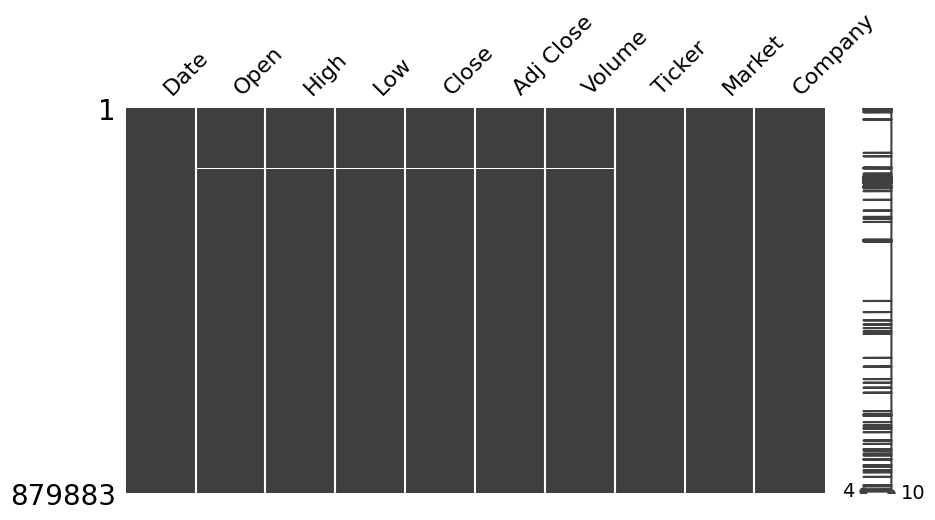

In [ ]:
# check missing values

msno.matrix(data, figsize=(10, 5))

In [ ]:
missing_values_count = data.isnull().sum()
print("Missing values quantities (BEFORE):")
print(missing_values_count)

Missing values quantities:
Date            0
Open         3630
High         3630
Low          3630
Close        3630
Adj Close    3630
Volume       3630
Ticker          0
Market          0
Company         0
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
missing_values_count = data.isnull().sum()
print("Missing values quantities (AFTER):")
print(missing_values_count)

Missing values quantities (AFTER):
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
Market       0
Company      0
dtype: int64


<Axes: >

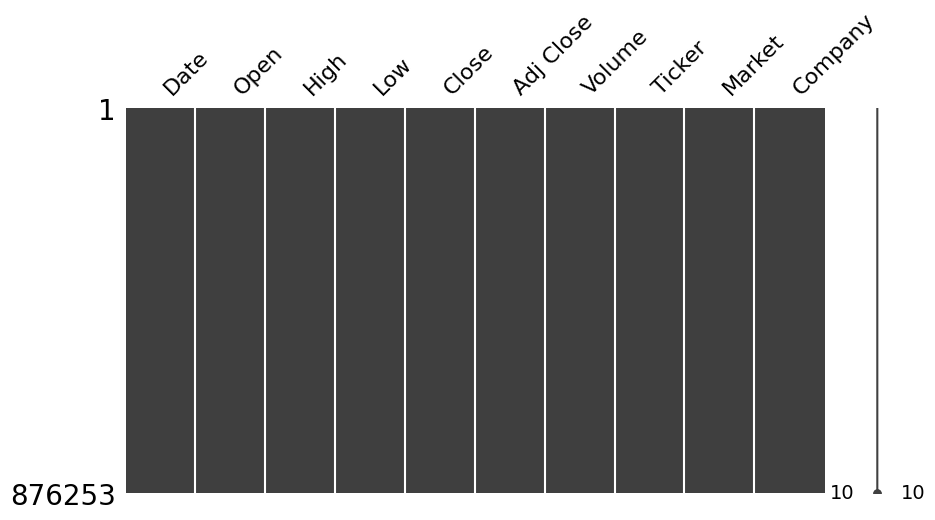

In [ ]:
# check missing values

msno.matrix(data, figsize=(10, 5))

### VERIFY AND REMOVE DUPLICATED LINES

In [ ]:
# Verifique o número de linhas completamente duplicadas
duplicatas = data.duplicated(keep=False)
print('Duplicated lines number (BEFORE):', sum(duplicatas))


Número de linhas completamente duplicadas: 11036


In [ ]:
# Remova as linhas completamente duplicadas
data = data.drop_duplicates(keep='first')

# Verifique novamente o número de linhas completamente duplicadas
duplicatas = data.duplicated(keep=False)
print('Duplicated lines number (AFTER):', sum(duplicatas))

Duplicated lines number (AFTER): 0


### DATA STANDARDIZATION

In [ ]:
# select the columns to be standardized
cols_to_standardize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# create the StandardScaler instance
scaler = StandardScaler()

# group data by Ticker
grouped_data = data.groupby('Ticker')

# calculate the total number of iterations
total_iterations = len(cols_to_standardize) * len(grouped_data)

# initialize the progress bar
progress_bar = tqdm(total=total_iterations, unit='iteration', ncols=80)

# standard z-score looping
for col in cols_to_standardize:
    for name, group in grouped_data:
        group[col+'_norm'] = scaler.fit_transform(group[[col]])
        data.update(group)
        
        # update the progress bar
        progress_bar.update(1)

# close the progress bar
progress_bar.close()

In [ ]:
# select the columns to be stardized
cols_to_standardize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# create the StandardScaler instance
scaler = StandardScaler()

# group data by Ticker
grouped_data = data.groupby('Ticker')

# standard z-score looping
for col in tqdm(cols_to_standardize):
    for name, group in tqdm(grouped_data):
        group[col+'_norm'] = scaler.fit_transform(group[[col]])
        data.update(group)


100%|██████████| 6/6 [22:56<00:00, 229.44s/it]


In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Market,Company,Open_norm,High_norm,Low_norm,Close_norm,Adj Close_norm,Volume_norm
0,2023-06-07,95.099998,95.949997,94.50,95.550003,95.550003,6265.0,RZAT11.SA,Bens Industriais,Riza Arctium Real Estate FII Closed Fund,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023-03-10,10.000000,10.000000,10.00,10.000000,9.901186,1.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...,-0.296938,-2.207307,-0.001227,-2.010490,-1.598488,-0.611601
2,2023-03-13,10.050000,10.050000,10.05,10.050000,9.950692,200.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...,-0.038178,-1.103654,0.185825,-0.944056,-0.986971,-0.540310
3,2023-03-14,10.050000,10.060000,9.00,10.060000,9.960593,400.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...,-0.038178,-0.882923,-3.742261,-0.730769,-0.864670,-0.468661
4,2023-03-15,10.050000,10.050000,10.05,10.050000,9.950692,22.0,GRWA11.SA,Bens Industriais,Fiagro Greenwich Fundo de Investimento nas Cad...,-0.038178,-1.103654,0.185825,-0.944056,-0.986971,-0.604078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879878,2023-06-01,6.650000,6.710000,6.52,6.700000,6.700000,1875200.0,CPLE3.SA,Utilidade Pública,Copel,1.820456,1.806929,1.801919,1.851292,2.384112,0.453549
879879,2023-06-02,6.730000,6.750000,6.66,6.730000,6.730000,2266400.0,CPLE3.SA,Utilidade Pública,Copel,1.867943,1.830378,1.886365,1.869124,2.400215,0.647316
879880,2023-06-05,6.730000,6.760000,6.65,6.720000,6.720000,845200.0,CPLE3.SA,Utilidade Pública,Copel,1.867943,1.836240,1.880333,1.863180,2.394847,-0.056625
879881,2023-06-06,6.710000,6.860000,6.70,6.860000,6.860000,1884400.0,CPLE3.SA,Utilidade Pública,Copel,1.856071,1.894860,1.910493,1.946393,2.469992,0.458106


## **4 - Construct and Apply the Model**

## **5 - Make it Applicable**

## **6 - Improve and optmize**

## **7 - Maintain**